<h1 style="text-align: center; font-size:50px; font-family: Calisto MT; color: #722F37">The Quest to Fine Wine</h1>
<h2 style="text-align: center; color: #722F37"> Tovohaja R. <h2>

<img style="padding:0px;border: solid black; margin-left: 70px" src="https://cruwineinvestment.com/wp-content/uploads/2015/10/wine-bottle-and-yard-900x506.jpg" alt="Good wine picture :)" width=80% height=80%>

<h1 style="text-align: center; "> Introduction </h1>
    <p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
Finding good wine is an endeavor that dates <a href="https://winefolly.com/update/a-brief-illustrated-history-of-wine/">millenia</a>. Once a laborious task, curating and distinguishing the good to great wines is now facilitated by data-science, powerful computing machines, and the seemingly limiteless supply of data available today.
<br><br>
As a wine enthusiast myself, I had many questions about wine, and sought to apply my data-science skills to answer them. Many a times I have been known to buy wine without second guessing its quality or whether its price was justified. If the description sounded good to me and the bottle was aesthetically pleasing, I did not hesitate to buy it for whatever special event I was celebrating. I don't drink much wine so I am not alert to the nuances that make some wines so good and others decent. Fortunately, I don't have to spend exorbitant sums of cash to taste every single wine just to be a more educated wine consumer. Numerous wine experts have done that work for us and made their findings available to the public through various <a href="https://www.ranker.com/list/wine-websites/dot-commander">wine related websites</a>.
<br><br>
Harnessing the power of data science, python libraries tailor made for data science, I can answer all my lingering questions about wine. Firstly, I find the distribution of wine quality across countries and pinpoint regions with higher quality wines. Secondly, I test the assumption that the price of wine increases as its quality increases. Then I form a model which would help me find the expected price of a wine given its quality. Such a model would allow me to find the gems - wines that cost little compared to their very high quality - and also filter out overpriced wines in my wine selection. Afterwards, I explore the age-old saying that the <i>vintage</i> (aka age) of wine reflects its quality. Finally, using natural language processing, I look for common descriptors of great wines.
    </p>

<h1 style="text-align: center ;">Data Collection</h1>

<h2> Creating and structuring SQLITE database </h2>
    <p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
In order to structure the database in a way that made sense, it was important to first identify what elements would actually be scraped and parsed from the source website. In this case, I used <a href="https://www.winemag.com">winemag</a> to source the data for this project. By identifying patterns in the structure of the webpages, using the <i>Inspect Element</i> feature, I could determine what pieces of information I could get systematically, and devise a scraping/parsing algorithm to obtain them. I built the headers of my data table from those element names. Namely, 
<br><br>
<ul>
    <li> title </li>
    <li> vintage: year in which the grapes were harvested </li>
    <li> points: scored out of 100 points </li>
    <li> badge: eg. Cellar Selection, Editor's Choice </li>
    <li> description: notes on the wine by the taster/reviewer </li>
    <li> price (USD) </li>
    <li> image_url </li>
    <li> designation: name associated with wine eg. "Brut Blanc de Blancs" </li>
    <li> variety: eg. Chardonnay, Rosé </li>
    <li> region 1 </li>
    <li> region 2</li>
    <li> province </li>
    <li> country </li>
    <li> winery: winery that produces the wine </li>
    <li> alcohol content: % alcohol </li>
    <li> category: eg. Red, White, Rose wine  </li>
    <li> taster's name </li>
    <li> taster's image_url </li>
    <li> taster's description </li>
</ul>
To create the database we run the "make_db.sql" query on our database file. On the terminal window we do: sqlite3 wines.db < make_db.sql
<br>
"make_db.sql" is shown below
    </p>

In [ ]:
CREATE TABLE Wines (  
	Title TEXT NOT NULL,
    Vintage DATE NULL,
    Points INTEGER NOT NULL,
    Badge TEXT NULL,
    Description TEXT NOT NULL,
    Price INTEGER  NULL,
    Image TEXT NOT NULL, 
    Designation TEXT NULL, 
    Variety TEXT NULL,
    Region1 TEXT NULL,
    Region2 TEXT NULL,
    Province TEXT NULL,
    Country TEXT NULL,
    Winery TEXT NULL,
    Alcohol INTEGER  NULL,   
	BottleSize INTEGER  NULL,
    Category TEXT NULL,
    Taster_name TEXT NULL,
    Taster_image TEXT NULL,
    Taster_description TEXT NULL
);

<h2> Scraping & Parsing </h2>
    <p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
My methodology for collecting and parsing data: (1) get all the search page urls, (2) and for each one of those, collect and parse the data in the inner url.
<br><br>
<b>Scraping</b> the website for the data itself was no straightforward task. Initially, I used the standard requests python module with default parameters to get the web content. The response from my requests though were empty and didn't contain the content I needed to do this project. I then proceeded to use urllib and applied headers so I could pretend to be a browser and hence the view the content I needed. Sure enough, the response I received from sending in requests to the sites contained the information I needed. However I found quickly that scraping enormous amounts of data was taking too long. I did a little digging online, and found that applying random proxies would help speed up the process, so I implemented a random proxy program. I could have done more to <a href="https://hackernoon.com/web-scraping-tutorial-with-python-tips-and-tricks-db070e70e071">speed up the web scraping</a>, but doing this alone sped it up considerably and also made my scraping anonymous so I wouldn't get blocked by the site. For a list of free proxies to use, click <a href="https://free-proxy-list.net">here</a>.
<br><br>
<b>Parsing</b> was the next task once the data was collected. Careful inspection of the web page html structure made it easy to parse the data in an organized and systematic manner. Using <i>BeautifulSoup</i> and <i>regular expressions</i>, I parsed all the necessary information required and stored results succesfully in the database.
    </p>

<h2> Random Proxy Program </h2>

In [ ]:
import requests, pandas as pd, numpy as np
import re, os
from bs4 import BeautifulSoup
from random import choice
from urllib.request import Request, urlopen

def get_proxies(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    t_html = soup.find('table')
    df = pd.read_html(str(t_html))[0]
    with open('data/proxies.txt', 'a') as fout:
        for i, row in df.iterrows():
            try:
                fout.write(f"{row['IP Address']}:{int(row['Port'])}\n") 
            except:
                pass

def get_proxy():
    proxies = open('data/proxies.txt').readlines()
    px = choice(proxies)[:-1]
    return {"http": px}

def proxy_request(request_type, url, **kwargs):
    proxy = get_proxy()
    headers = {'User-Agent': 'Mozilla/5.0'}
    return requests.request(request_type, url, proxies=proxy, timeout=5, **kwargs, headers=headers)


<h2> Parse/Scrape Program </h2>

In [ ]:
import re, time, os, random, sqlite3, datetime
from tqdm import trange, tqdm
from bs4 import BeautifulSoup

import random_proxy

BASE_URL = 'https://www.winemag.com/?s=&drink_type=wine&pub_date_web={0}&page={1}'

# get url content as soup object
def get_soup(url):
        webpage = random_proxy.proxy_request('get', url).content
        return BeautifulSoup(webpage, "lxml")

# gets hrefs to inner_urls from the results page html/soup
def get_inner_urls(url):
    soup = get_soup(url)
    html = soup.find(class_="results")
    return re.findall(r'href=\"(https:\/\/www\..*)\"', str(html))

# __________________________________________________________________________________________________
# collects data from inner_url html contents
# parses relevant info, and returns resulting dict
def collect_data(url_inner):
    soup = get_soup(url_inner)

    # Titular attributes
    title = soup.find(class_="article-title").text
    vintage = re.search(r"\d{4}", title).group() \
        if re.search(r"\d{4}", title) else None
    
    # Rating   
    rating = soup.find(class_="rating")
    points = int(rating.find(id="points").text) \
        if rating.find(id="points") else None
    badges = rating.find(id="badges").text \
        if rating.find(id="badges") else None

    # Description & Image
    description = soup.find(class_ = "description").text
    image_html = soup.find(class_="wine-img-for-medium").find('img')
    image = re.search(r'src=\"(.*)\"', str(image_html)).group(1)

    # Primary
    primary_info = soup.find(class_='primary-info')
    primary_info_labels_html = primary_info.find_all(class_="info-label medium-7 columns")
    primary_info_values_html = primary_info.find_all(class_="info medium-9 columns")
    
    price, designation, variety, region1, region2, province, country, winery = [None]*8
    for i in range(len(primary_info_labels_html)):
        label = primary_info_labels_html[i].text[1:-1]
        value = primary_info_values_html[i].text[1:-1]

        if label == "Price":
            price = int(re.search(r"\d+", value).group()) \
                if re.search(r"\d+", value) else None
        elif label == "Designation":
            designation = value
        elif label == "Variety":
            variety = value.split(', ')[0]
        elif label == "Appellation":
            appelation = value.split(', ')
            if len(appelation) == 2:
                province = appelation[0]
                country = appelation[1]
            elif len(appelation) == 3:
                region1 = appelation[0]
                province = appelation[1]
                country = appelation[2]
            else:
                region1 = appelation[0]
                region2 = appelation[1]
                province = appelation[2]
                country = appelation[3]
        elif label == "Winery":
            winery = value
        else:
            pass
        
    # Secondary
    secondary_info = soup.find(class_='secondary-info')
    secondary_info_labels_html = secondary_info.find_all(class_="info-label small-7 columns")
    secondary_info_values_html = secondary_info.find_all(class_="info small-9 columns")

    alcohol, bottle_size, category = [None]*3
    for i in range(len(secondary_info_labels_html)):
        label = secondary_info_labels_html[i].text[1:-1]
        value = secondary_info_values_html[i].text[1:-1]

        if label == "Alcohol":
            alcohol = float(re.search(r"\d+(.\d+)?", value).group()) \
                if re.search(r"\d+(.\d+)?", value) else None
        elif label == "Bottle Size":
            bottle_size = int(re.search(r"\d+", value).group())
        elif label == "Category":
            category = value
        else:
            pass

    # Taster
    taster = soup.find(class_='taster')
    taster_name, taster_image, taster_description = [None]*3
    if taster:
        taster_name = taster.find(class_="name").text
        taster_image = re.search(r'src=\"(.*)\"', str(taster.find("img"))).group(1)
        taster_description = taster.find(class_="long-description dont-break-out").text
    
    return {
        'title': title,
        'vintage': vintage,
        'points': points,
        'badges': badges,
        'description': description,
        'image': image,

        'price': price,
        'designation': designation,
        'variety': variety,
        'region1': region1,
        'region2': region2,
        'province': province,
        'country': country,
        'winery': winery,

        'alcohol': alcohol,
        'bottle_size': bottle_size,
        'category': category,

        'taster_name': taster_name,
        'taster_image': taster_image,
        'taster_description': taster_description
    }

# __________________________________________________________________________________________________
# Loads data from calling collect_data(inner url)
# into specified database
# BUG
def load_into_database(data_dict, db_name):
    conn = sqlite3.connect(f"data/{db_name}")
    cursor = conn.cursor()
    

    qmarks = ','.join(["?"]*(len(data_dict)))
    query = f'INSERT INTO Wines VALUES ({qmarks});'
    values = (
        data_dict.get('title'),
        data_dict.get('vintage'),
        data_dict.get('points'),
        data_dict.get('badges'),
        data_dict.get('description'),
        data_dict.get('price'),

        data_dict.get('image'),
        data_dict.get('designation'),
        data_dict.get('variety'),
        data_dict.get('region1'),
        data_dict.get('region2'),
        data_dict.get('province'),
        data_dict.get('country'),
        data_dict.get('winery'),

        data_dict.get('alcohol'),
        data_dict.get('bottle_size'),
        data_dict.get('category'),

        data_dict.get('taster_name'),
        data_dict.get('taster_image'),
        data_dict.get('taster_description')
    )

    cursor.execute(query, values)
    conn.commit()
    conn.close()

# __________________________________________________________________________________________________
# Writes all the hrefs to file for all inner urls given a filter
# Too taxing to download all the data, so I'm picking a random sample from each year_filter
def get_hrefs(filter, limit):
    with open('data/hrefs.txt', 'a') as fout:
        pages = random.sample(range(1, filter[1]+1), limit)
        for i in trange(limit):
            page_url = BASE_URL.format(filter[0], pages[i])
            for href in get_inner_urls(page_url):
                fout.write(href + "\n")

# gets all hrefs given a filters tuple list
def collect_hrefs(filters, limit):
    for filter in filters:
        try:
            get_hrefs(filter, limit)
        except:
            pass

# __________________________________________________________________________________________________
if __name__ == "__main__":
    start_time = time.time()

    # grouping search results -> (dates, pages) list
    filters = [
        ('2019,2018', 2025),
        ('2017,2016', 2259),
        ('2015,2014', 1908),
        ('2013,2012,2011', 2450),
        ('2010,2009,2008', 1984),
        ('2007,2006,2005,2004,2003,2002', 2371),
        ('2001,2000,1999,1970,1969', 361)
    ]
    print("Collecting hrefs...")
    collect_hrefs(filters, 150)

    # loading wine reviews into structured database
    # store broken hrefs in file
    db_name = 'wines.db'
    hrefs = open('data/hrefs.txt').read().split('\n')
    f_broken = open('data/broken_hrefs', 'w')
    
    print(f"Loading data into database {db_name}")
    for i in trange(len(hrefs)):
        try: 
            data = collect_data(hrefs[i])
            load_into_database(data, db_name)
        except:
            f_broken.write(hrefs[i] + '\n')
            pass

    time = time.time() - start_time
    print(f"\n\nDone. Time -> {str(datetime.timedelta(seconds=int(time)))}")


<h2> Collection results </h2>
    <p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
In total, I collected 22,489 wine reviews. 57 urls gave an invalid response since the html structure was completely different on those pages. Some fields were null but on the whole, collection and parsing was a success. There is bound to be some mislabeling from the people who put the data on th website, but being that winemag is the premier source for wine reviews, we can trust its accuracy.
<br><br>
    </p>

<h1 style="text-align: center ;">Data Processing</h1>

<h2> Data wrangling | Entity Resolution </h2>
    <p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
To facilitate fine-tuning of data, I used a <a href="https://www.guru99.com/top-20-sql-management-tools.html">database IDE</a>.
<u>Vintage:</u> As a marketing ploy, i suspect that some sellers place a dubious old vintage to their title which makes it ambiguous for the user to know the vintage of the bottle. One instance of this problem is a bottle that has 1531 attached to its title without any other year which may indicate otherwise. Upon further inspection, I saw that actually the 1531 comes form the designation and has nothing to do with the vintage of the bottle. Vintage here then would be set to null in my dataset. As for the other few rows with misleading vintages, their vintage is set to the appropriate year if present in the title, and null if it's a clear misprint (eg. vintage 3018)
<br><br>
<u>Alcohol%:</u>The alcohol% was incorrectly labeled for certain items. By sorting by alcohol I saw several rows with alcohol% well past 100% which is impossible. I set the alcohol% for those rows to null. Wine content only go up as high as 30% so anything above that is a labeling error. 
<br><br>
<u>Missing data:</u>Given the random nature of the scraping, and the fact that there is no reason to believe that missing data is anything but Missing Completely At Random, there are no worries here. Our large dataset makes up for the missing points. 
<br><br>
    </p>

<h1 style="text-align: center ;">Exploratory Analysis & Data Visualization</h1>

In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

<h2> Getting started </h2>
    <p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
For the purposes of this project we only need certain headers from the database, in a specific order. To load our sqlite database into a pandas dataframe, we have to open a connection to the database, apply a custom query, and close the connection once we have our dataframe.
    </p>

In [2]:
# connecting to database
conn = sqlite3.connect("data/wines.db")

# Orders and selects relevant columns, selects only distinct rows. Orders rows by vintage in desceding order.
query = '''
SELECT DISTINCT 
Title, Vintage, Points, Price, Badge, Description, Designation, 
Variety, Region1, Region2, Province, Country, Winery, Alcohol, Category, Taster_name
FROM Wines
ORDER BY Points DESC;
'''

# store dataframe
df = pd.read_sql(query, conn)


# close connection
conn.close()

<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
To get a sense of what our dataframe looks like, let's run the following command to take a quick peek of our table's 
first five rows. 
</p>

In [3]:
df.head()

,Title,Vintage,Points,Price,Badge,Description,Designation,Variety,Region1,Region2,Province,Country,Winery,Alcohol,Category,Taster_name
0,Krug 2002 Brut (Champagne),2002.0,100,259.0,Cellar Selection,This is a fabulous wine from the greatest Cham...,Brut,Champagne Blend,Champagne,None,Champagne,France,Krug,12.0,Sparkling,Roger Voss
1,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,2008.0,100,80.0,,Initially a rather subdued Frog; as if it has ...,Bionic Frog,Syrah,Walla Walla Valley (WA),Columbia Valley,Washington,US,Cayuse,14.4,Red,Paul Gregutt
2,Krug 2002 Clos du Mesnil Brut Blanc de Blancs ...,2002.0,99,800.0,Cellar Selection,Pure Chardonnay from the walled vineyard in th...,Clos du Mesnil Brut Blanc de Blancs,Chardonnay,Champagne,None,Champagne,France,Krug,12.0,Sparkling,Roger Voss
3,Benovia 2016 Tilton Hill Pinot Noir (Sonoma Co...,2016.0,98,60.0,Editors’ Choice,This comes from the producer's coolest estate ...,Tilton Hill,Pinot Noir,Sonoma Coast,Sonoma,California,US,Benovia,14.2,Red,Virginie Boone
4,Salon 2004 Le Mesnil Blanc de Blancs Brut Char...,2004.0,98,520.0,Cellar Selection,Salon's releases are rare and signify a great ...,Le Mesnil Blanc de Blancs Brut,Chardonnay,Champagne,None,Champagne,France,Salon,12.0,Sparkling,Roger Voss


<h2> Overview </h2>
<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
I always find the pair-plots particularly useful when I'm unsure about steps forward in a data science project. The general insight is helpful, however one must heed caution not to make hasty conclusions from these plots:
</p>

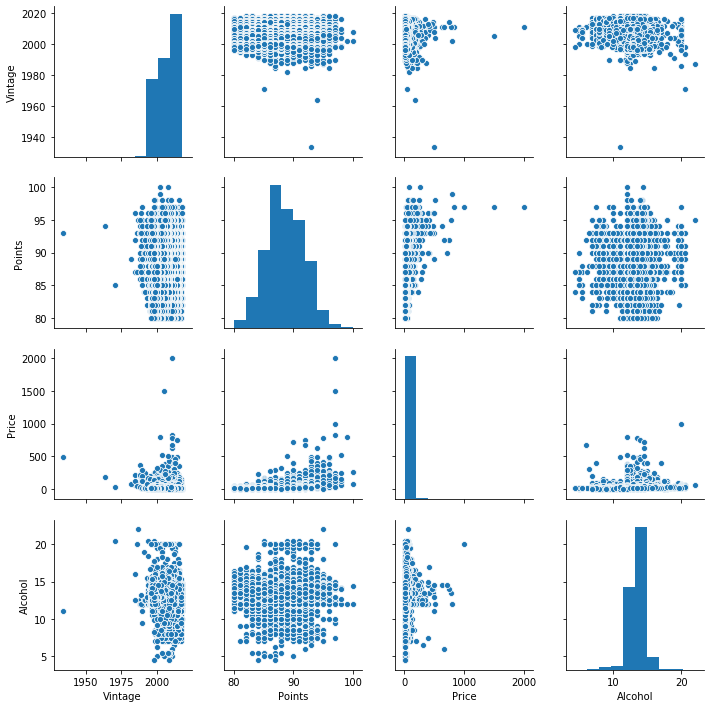

In [5]:
sns.pairplot(df)

<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
It's hard to decipher any clear relationship from the pair plots above, but at least it gives us an overview of potential trends to look for in our dataset, and some idea of the data distribution across parameters. For instance, from these pair plots alone we can make the following observations:
    <ul>
        <li> Vintage spans a wide range from 1930 to 2019. Though it's rare to find really old wines. </li>
        <li> Some of the really expensive wines are actually more recent. </li>
        <li> The points range from 80 to 100, and follow what looks like a normal distribution.</li>
    </ul>
</p>


<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
For a summary of dataset statistics, we can also do:
</p>

In [6]:
df.describe()

,Vintage,Points,Price,Alcohol
count,20987.000000,21806.000000,20463.000000,17562.000000
mean,2007.490256,88.093231,32.298734,13.510615
std,6.529018,3.098457,36.818497,1.246149
min,1934.000000,80.000000,4.000000,4.500000
25%,2002.000000,86.000000,15.000000,13.000000
50%,2008.000000,88.000000,24.000000,13.500000
75%,2013.000000,90.000000,39.000000,14.200000
max,2018.000000,100.000000,2000.000000,22.000000


<h2> Wine Quality vs Country </h2>
    <p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
How does each country fare in terms of wine quality? Let's make a barplot of the mean points of wine for each country in our dataset:
    </p>

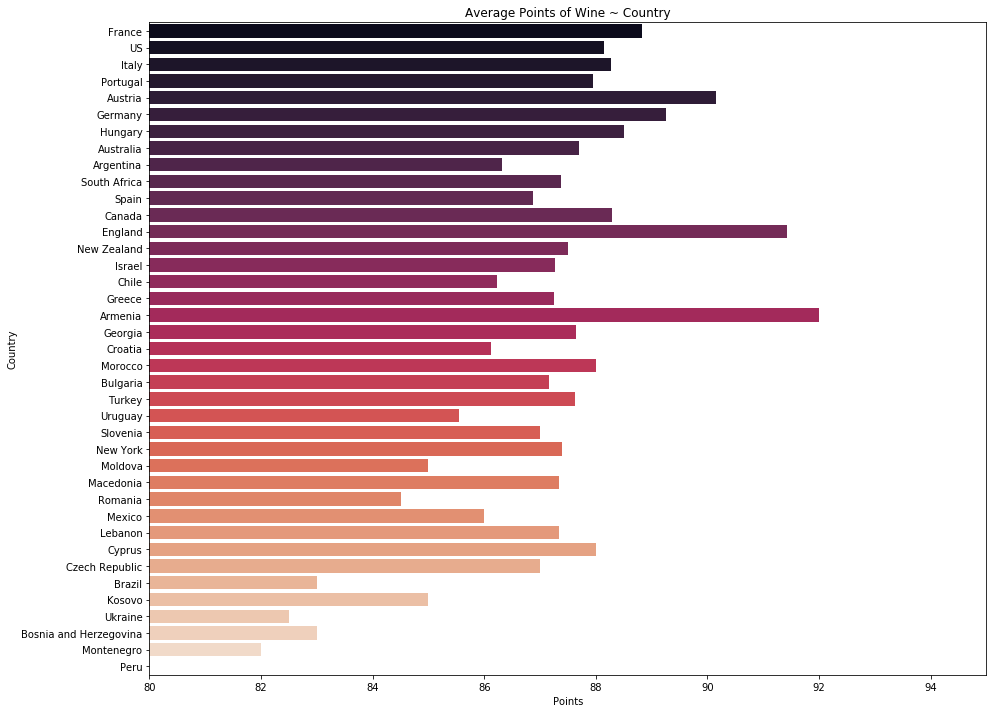

In [7]:
def barplot(title, x_name, y_name, dataframe, x_r, size):
    fig, ax = plt.subplots(1, 1, figsize=size) # setup figure
    plt.title(title) # set title
    plt.xlim(x_r[0], x_r[1]) # set the window for x values
    # barplot using specified axes, and ci=False removes confidence interval ticks
    clrs = "rocket"
    sns.barplot(y=y_name, x=x_name, data=dataframe, ax=ax, ci=False, palette=clrs, hue_order=x_name)

# definining a function makes code reusable
barplot("Average Points of Wine ~ Country", "Points", "Country", df, (80, 95), (15,12))

<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
The top 3 countries in terms of overall wine quality according to the bar plot above are:
<ol>
    <li><b>Armenia:</b> 92 points</li>
    <li><b>England:</b> 91 points</li>
    <li><b>Austria:</b> 90 points</li>
</ol>
Let's double check that the sample size is large enough for those top 3:
</p>

In [8]:
num_Armenia = len(df[df.Country == "Armenia"])
num_England = len(df[df.Country == "England"])
num_Austria = len(df[df.Country == "Austria"])
print(f"Armenia: {num_Armenia} wines | England: {num_England} wines | Austria: {num_Austria} wines")

Armenia: 1 wines | England: 7 wines | Austria: 482 wines


<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
So, too few wines to qualify Armenia and England for the top spots.
Next in line are Austria, Germany, and France
</p>

In [9]:
num_Austria = len(df[df.Country == "Austria"])
num_Germany = len(df[df.Country == "Germany"])
num_France = len(df[df.Country == "France"])
print(f"Austria: {num_Austria} wines | Germany: {num_Germany} wines | France: {num_France} wines")

Austria: 482 wines | Germany: 364 wines | France: 3315 wines


In [10]:
rating_Austria = df[df.Country == "Austria"].Points.mean()
rating_Germany = df[df.Country == "Germany"].Points.mean()
rating_France = df[df.Country == "France"].Points.mean()
print(f"Austria: {rating_Austria:.2f} points | Germany: {rating_Germany:.2f} points | France: {rating_France:.2f} points")

Austria: 90.15 points | Germany: 89.26 points | France: 88.83 points


<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
There are enough data points to label these as top 3, so the adjusted top 3: 
    <ol>
        <li><b>Austria:</b> 90.15 points</li>
        <li><b>Germany:</b> 89.26 points</li>
        <li><b>France:</b> 88.83 points</li>
    </ol>
</p>

<h2> Quality of Wine in the Provinces of the Top 3 countries </h2>
<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
Now that we narrowed the top countries in terms of wine quality, we can narrow the areas of top wines further by grouping wines by provinces across each country.
</p>

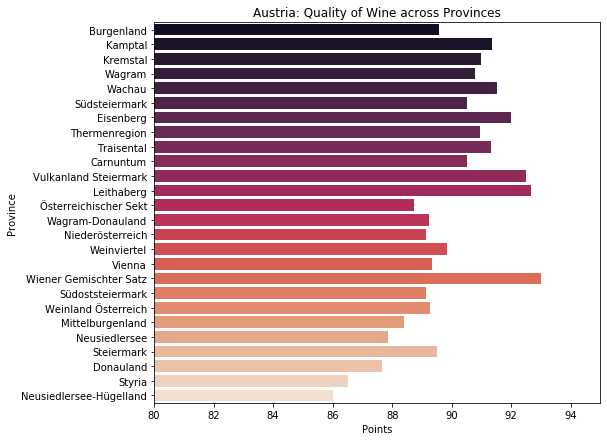

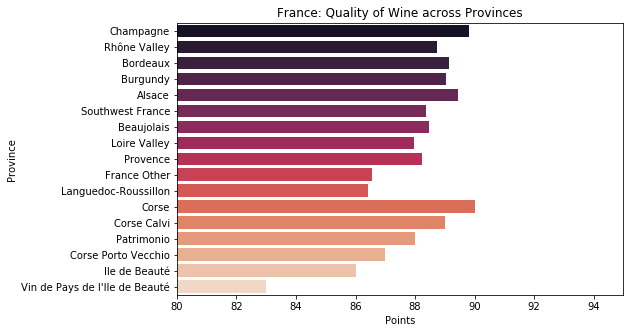

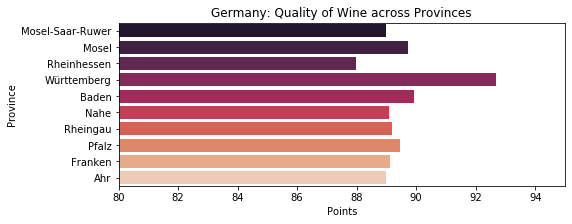

In [11]:
for country, country_df in df.groupby('Country'):
    if country == "Austria":
        barplot("Austria: Quality of Wine across Provinces", "Points", "Province", country_df, (80, 95), (8,7))
    elif country == "Germany":
        barplot("Germany: Quality of Wine across Provinces", "Points", "Province", country_df, (80, 95), (8,3))
    elif country == "France":
        barplot("France: Quality of Wine across Provinces", "Points", "Province", country_df, (80, 95), (8,5))
    else:
        pass

<h2> Price of Wine vs Country </h2>
<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
What about average price of wine per country? Let's make a barplot of the price of wine for each country in our dataset:
</p>

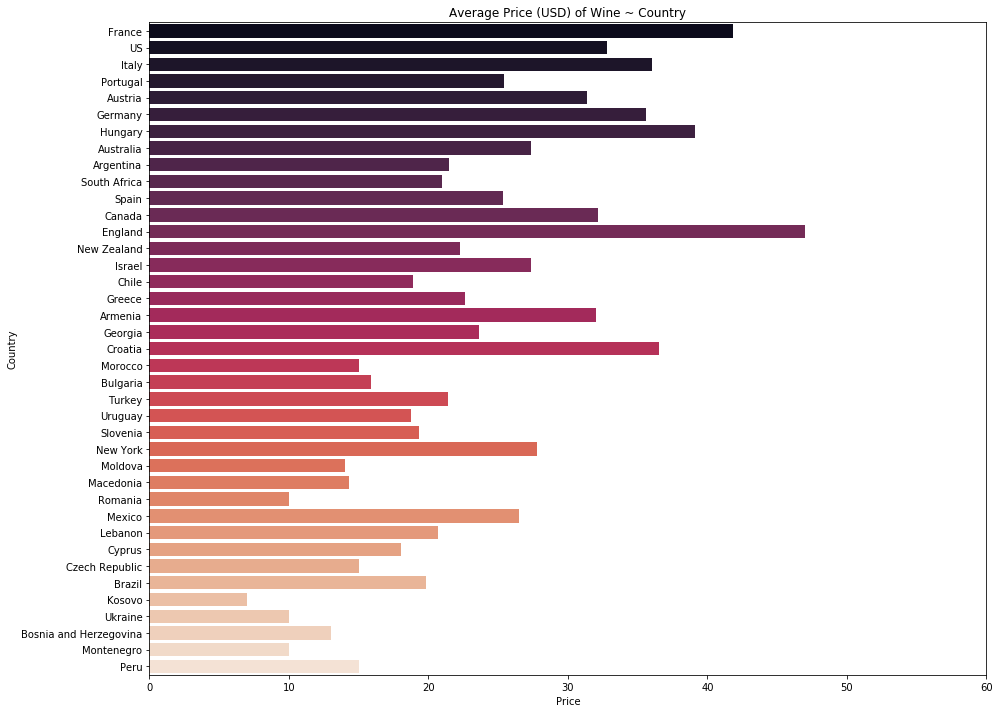

In [12]:
barplot("Average Price (USD) of Wine ~ Country", "Price", "Country", df, (0, 60), (15,12))

<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
The most expensive wines reside in the following countries, based on aggregate price:  
<ol>
    <li><b>England:</b> 48 USD</li>
    <li><b>France:</b> 42 USD</li>
    <li><b>Hungary:</b> 40 USD</li>
    <li><b>Croatia:</b> 37 USD</li>
</ol>
England ranked second in terms of wine quality in our initial list so it's not surprising to see that it stocks more expensive wines than other countries. However, if price and quality are positively correlated, we would expect Austria to have very expensive wines as well yet this is not the case. Hence, it would seem that although there may be a positive relationship between wine price and quality, some wines certainly are very high quality for their price. 
</p>

<h1 style="text-align: center;">Analysis, hypothesis testing & Machine Learning</h1>

<h2>Wine Quality vs Points</h2>

<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
Let's plot a scatter plot of price to points to further investigate:
</p>

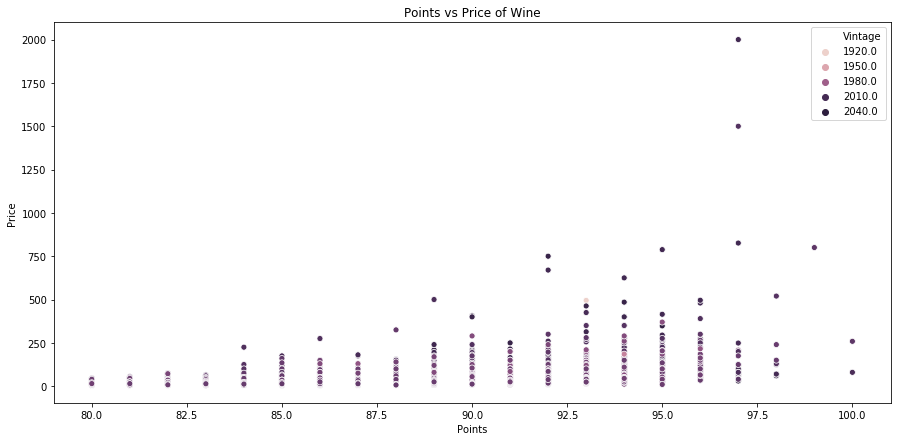

In [13]:
# Wines: Points ~ Price
fig, axes = plt.subplots(figsize=(15,7))
plt.title("Points vs Price of Wine")

# adding hue='Vintage' to see if it is correlated to price ~ points
sns.scatterplot(x = 'Points', y = 'Price', data=df, ax = axes, hue='Vintage')

<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
Just from looking at the scatterplot we can't see how vintage interrelates with price and points but we can look into that some more later on. 
<br>
There are several outliers in this plot that obstruct our visualization of the data. To improve our visualization, we can add the parameter showfliers=False to an sns boxplot to remove the effect of those outliers:
</p>

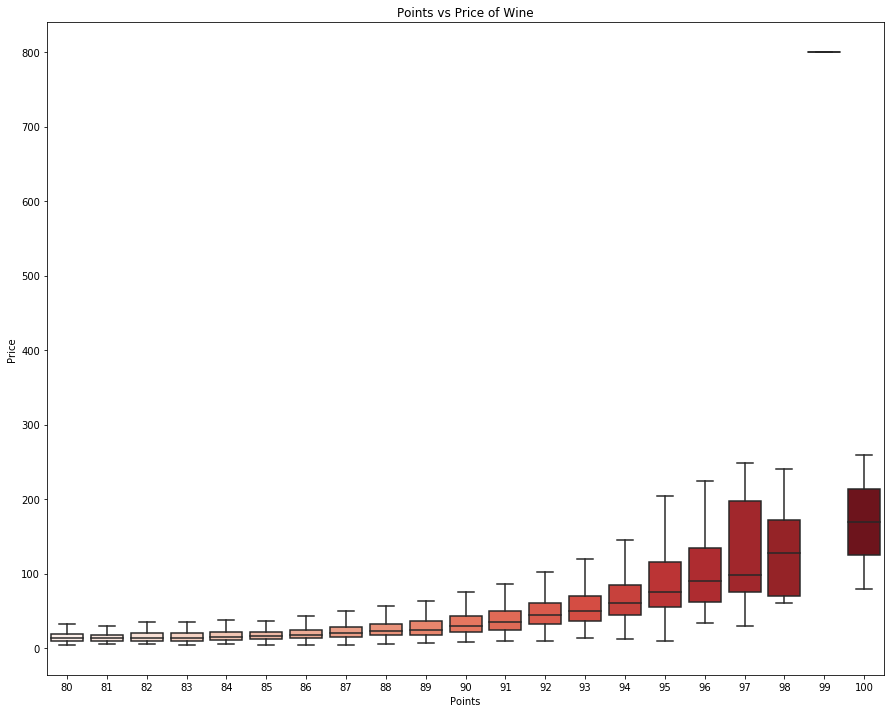

In [14]:
# Scatterplot 0> maybe do heatmap instead?
# Wines: Vintage ~ Price
fig, axes = plt.subplots(1, 1, figsize = (15,12))
plt.title("Points vs Price of Wine")
sns.boxplot(x = 'Points', y = 'Price', data=df, ax = axes, showfliers=False, palette="Reds")

<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
Finally, we get to see the relationship between price and quality more clearly with the help of this modified boxplot. As expected, the price of wine looks like it increases as the quality increases. Now that we established the relationship, we can build a model around it:
</p>

In [15]:
# making a copy of the df where missing values for points and price are mean imputed
clean_df = df
clean_df.Points.fillna(df.Points.mean(), inplace=True)
clean_df.Price.fillna(df.Price.mean(), inplace=True)

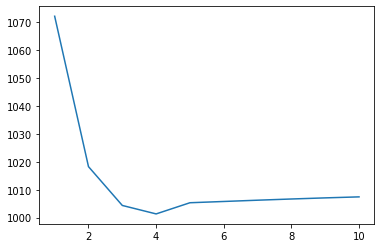

In [16]:
# k-Fold Cross-Validation to determine model

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm
import statsmodels.api as sm


lm = skl_lm.LinearRegression()

cross_validation = KFold(n_splits=10, random_state=1, shuffle=True)

x, y = clean_df.Points, clean_df.Price
X = np.array(x).reshape(-1,1)

mse = []

for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)
    X_i = poly.fit_transform(X)
    mod = lm.fit(X_i, y)
    scores = cross_val_score(mod, X_i, y, scoring="neg_mean_squared_error", cv=cross_validation, n_jobs=1)
    
    mse.append(np.mean(np.abs(scores)))

plt.plot(np.arange(1,11), mse)

<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
The model with degree=3 is best suited for our analysis. It achieves a means square error nearly equal to that of a model with degree=4. The p-values are essentially zero, so we have to reject the null hypothesis that there is no relationship between wine quality and price. 
</p>

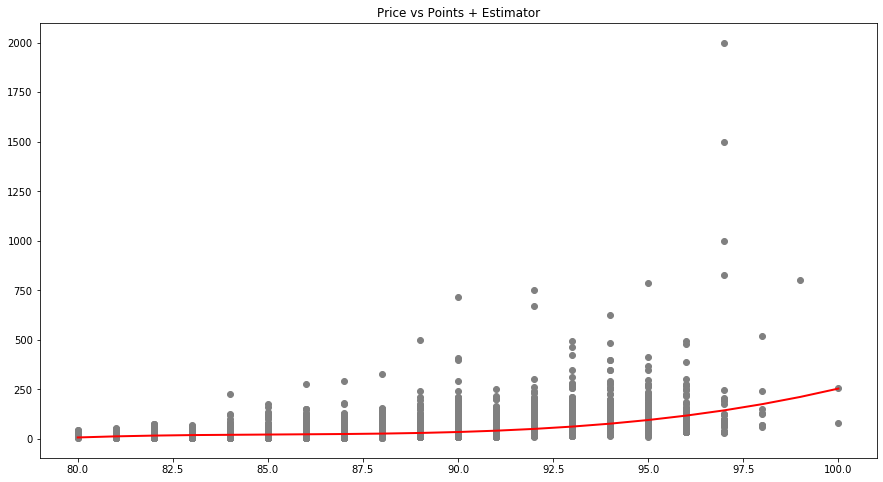

In [17]:
# choose poly model 3 -> low MSE ~ deg=4
# reshaping and transforming data to work with OLS
X = np.array(x).reshape(-1,1)
poly = PolynomialFeatures(degree=3)
xp = poly.fit_transform(X)
mod = sm.OLS(y, xp).fit()

# make predictions
yp = mod.predict(xp)

# plot scatter plot and esimator
plt.figure(figsize=(15,8))
plt.title("Price vs Points + Estimator")
plt.scatter(x, y, color='gray')
plt.plot(x, yp, color='red', linewidth=2)

In [18]:
# To get the model summary:
mod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.212      
Dependent Variable: Price            AIC:                212556.1886
Date:               2019-07-19 12:36 BIC:                212588.1484
No. Observations:   21806            Log-Likelihood:     -1.0627e+05
Df Model:           3                F-statistic:        1962.      
Df Residuals:       21802            Prob (F-statistic): 0.00       
R-squared:          0.213            Scale:              1001.8     
--------------------------------------------------------------------
          Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
--------------------------------------------------------------------
const  -41479.0206 2506.0577 -16.5515 0.0000 -46391.0762 -36566.9650
x1       1458.7764   85.3916  17.0834 0.0000   1291.4028   1626.1501
x2        -17.1047    0.9691 -17.6499 0.0000    -19.0042    -15.2051
x3          0.0669    0.0037  18.2631 0.0000      0.0597      0.0741
--------------------------------------------------------------------
Omnibus:           46816.682     Durbin-Watson:        1.800        
Prob(Omnibus):     0.000         Jarque-Bera (JB):     577290710.004
Skew:              18.687        Prob(JB):             0.000        
Kurtosis:          799.227       Condition No.:        8072645955   
====================================================================
* The condition number is large (8e+09). This might indicate
strong multicollinearity or other numerical problems.
"""

<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
    Looking at the plot above, our first instinct is to say that a large proportion of wines are overpriced. In actuality, there are probably other factors apart from quality of the wine that can make it much more expensive. For example, when supply is scarce and demand is high, the price of an item goes up substantially. Indeed, many <a href="https://winefolly.com/tutorial/why-is-wine-so-expensive/">factors affect the price of wine</a>. Nonetheless, the principal driving factor seems to be the quality (points). 
</p>

In [19]:
def predict_price(wine_points):
    z = [wine_points]
    Z = np.array(z).reshape(-1,1)
    zp = poly.fit_transform(Z)
    
    return mod.predict(zp)[0]

<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
    Wines with prices well below their expected price are especially cheap given their quality. We can use our predict_price function to filter these gem wines.
</p>

In [20]:
best_buy_wines = clean_df[clean_df.Price < predict_price(clean_df.Points) - 6.7 * clean_df.Price.std()]
best_buy_wines[best_buy_wines.Points > 90]

,Title,Vintage,Points,Price,Badge,Description,Designation,Variety,Region1,Region2,Province,Country,Winery,Alcohol,Category,Taster_name
355,Apollonio 1997 Red (Copertino),1997.0,95,10.0,Best Buy,One of the most satisfying wines I have had in...,None,Red Blends,Copertino,None,Southern Italy,Italy,Apollonio,13.5,Red,None
788,Raimat 1994 Vallorba Cabernet Sauvignon (Coste...,1994.0,94,12.0,Best Buy,This wine comes from a single 28-acre vineyard...,Vallorba,Cabernet Sauvignon,Costers del Segre,None,Catalonia,Spain,Raimat,NaN,Red,Roger Voss
1721,Te Kairanga 2001 Sauvignon Blanc (Martinborough),2001.0,93,14.0,Best Buy,"Unusually lush, even for this vintage, it star...",None,Sauvignon Blanc,None,None,Martinborough,New Zealand,Te Kairanga,NaN,White,None
2633,Château d'Aydie 2012 Madiran Laplace Tannat (M...,2012.0,92,13.0,Best Buy,"At the hands of Pierre Laplace, Tannat becomes...",Madiran Laplace,Tannat,Madiran,None,Southwest France,France,Château d'Aydie,14.0,Red,Roger Voss
2658,José Maria da Fonseca 2006 Moscatel de Setúbal,2006.0,92,10.0,Best Buy,The legendary Moscatel de Setúbal is produced ...,None,Moscatel,None,None,Moscatel de Setúbal,Portugal,José Maria da Fonseca,17.5,Fortified,Roger Voss
2664,Olsen Estates 2009 Blanc des Coteaux White (Ya...,2009.0,92,12.0,Best Buy,"A white Rhône-style blend—62% Roussanne, 34% V...",Blanc des Coteaux,Rhône-style White Blend,Yakima Valley,Columbia Valley,Washington,US,Olsen Estates,14.2,White,Paul Gregutt
2674,Bacalhôa Wines of Portugal 2008 Tinto da Anfor...,2008.0,92,13.0,Best Buy,"A mineral, tense wine, packed with delicious c...",Tinto da Anfora,Portuguese Red,None,None,Alentejano,Portugal,Bacalhôa Wines of Portugal,14.0,Red,Roger Voss
2737,Cameron Hughes 2010 Lot 335 Meritage (Oakville),2010.0,92,14.0,Best Buy,A Bordeaux-style blend made primarily from Mer...,Lot 335,Meritage,Oakville,Napa,California,US,Cameron Hughes,14.6,Red,None
3234,ST Staley Thomas 1997 Chardonnay (Russian Rive...,1997.0,92,13.0,Best Buy,Philip Staley has got off the Rhône ranger hor...,None,Chardonnay,Russian River Valley,Sonoma,California,US,ST Staley Thomas,NaN,White,None
3342,Chateau Ste. Michelle 1999 Horse Heaven Vineya...,1999.0,92,14.0,Best Buy,The Horse Heaven vineyard has been producing e...,Horse Heaven Vineyard,Sauvignon Blanc,Columbia Valley (WA),Columbia Valley,Washington,US,Chateau Ste. Michelle,13.0,White,Paul Gregutt


<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
Our predictive model does very well. All of the wines listed here unsurprisingly have the best buy badge on it already. Tweaking the parameters on our function and program, we could get the best of the best in terms of value for our money. 
</p>

<h2> Quality of Wine vs Vintage </h2>
<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
Let's make a boxplot of vintage to points and see if we can observe some correlation between the two. In making our boxplot, we remove the effects outliers and normalize the vintage -> age.
</p>

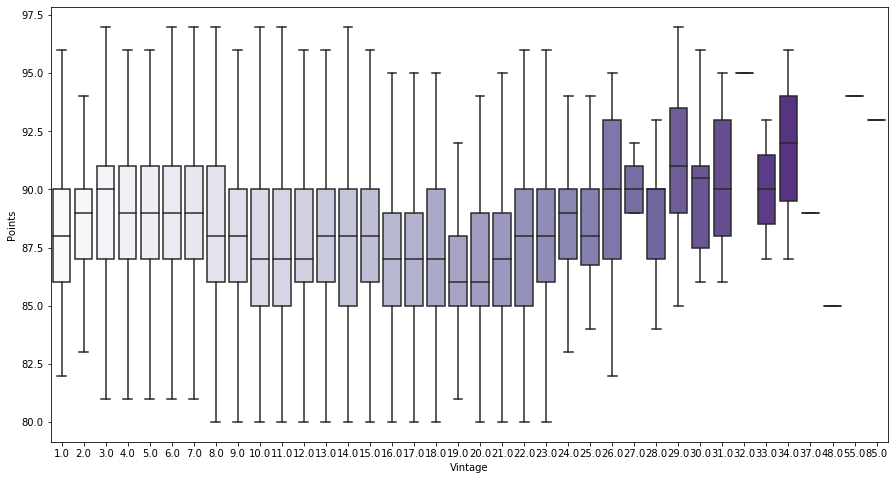

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(2019 - df.Vintage, df.Points, showfliers=False, palette="Purples")

plt.show()

<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
For the most part, there isn't really any discernable trend. There is too much variation to have confindence in any trend here. 
The quality of wine like other harvested produce is highly susceptible to the weather throughout the growing season.
Since weather is highly variable, it makes sense to see the large variability in our data.
Old wines do tend to have high ratings, however, which may indicate the impact of climate change on weather
in general, or maybe better wine making practices in older times, but that is beyond the scope of this project. 
</p>

<h2> So what makes a good wine? </h2>
<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
Let's apply Scikit's Natural Language Processing toolkit on the description of the wines to get an idea of what characteristics they tend to share in common. More specifically, let's analyze the common keywords
</p>

In [22]:
# Importing required packages
import nltk, string, collections
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords

In [23]:
# downloading stopwords corpus i.e. body of text containing The, That, This etc.
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tovohajarabemananjara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# Only interested in qualities of great wines
great_wines_df = df[df.Points > 90]
great_wines_df.head()

,Title,Vintage,Points,Price,Badge,Description,Designation,Variety,Region1,Region2,Province,Country,Winery,Alcohol,Category,Taster_name
0,Krug 2002 Brut (Champagne),2002.0,100,259.0,Cellar Selection,This is a fabulous wine from the greatest Cham...,Brut,Champagne Blend,Champagne,None,Champagne,France,Krug,12.0,Sparkling,Roger Voss
1,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,2008.0,100,80.0,,Initially a rather subdued Frog; as if it has ...,Bionic Frog,Syrah,Walla Walla Valley (WA),Columbia Valley,Washington,US,Cayuse,14.4,Red,Paul Gregutt
2,Krug 2002 Clos du Mesnil Brut Blanc de Blancs ...,2002.0,99,800.0,Cellar Selection,Pure Chardonnay from the walled vineyard in th...,Clos du Mesnil Brut Blanc de Blancs,Chardonnay,Champagne,None,Champagne,France,Krug,12.0,Sparkling,Roger Voss
3,Benovia 2016 Tilton Hill Pinot Noir (Sonoma Co...,2016.0,98,60.0,Editors’ Choice,This comes from the producer's coolest estate ...,Tilton Hill,Pinot Noir,Sonoma Coast,Sonoma,California,US,Benovia,14.2,Red,Virginie Boone
4,Salon 2004 Le Mesnil Blanc de Blancs Brut Char...,2004.0,98,520.0,Cellar Selection,Salon's releases are rare and signify a great ...,Le Mesnil Blanc de Blancs Brut,Chardonnay,Champagne,None,Champagne,France,Salon,12.0,Sparkling,Roger Voss


In [25]:
descriptions = '\n'.join(great_wines_df.Description)
words = tokens=word_tokenize(descriptions)

# filter out words + punctuation that add no meaning
punctuation = list(string.punctuation)
stop_words = set(stopwords.words("english") + punctuation)


filtered_words  = [w for w in words if not w in stop_words]
tags = nltk.pos_tag(filtered_words)

# Further filter out useless Cardinal digit, and determiner (The, This, etc), and other unnecessary fluff
useless = ['CD', 'DT', 'RB', 'EX', 'PRP', 'POS']
characteristics = list(filter(lambda t: t[1] not in useless, tags))

In [26]:
# storing characteristic words
characteristics = [c[0] for c in characteristics]

In [27]:
# store counts of each word in a list of words as a dict
# where dict= {word:count}
counter = collections.Counter(characteristics)

In [28]:
# sort by most common descriptors from the great wines (90+ points)
counts = sorted(counter.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)
counts[:50]

[('wine', 3446),
 ('fruit', 2049),
 ('flavors', 1997),
 ('tannins', 1450),
 ('palate', 1445),
 ('acidity', 1216),
 ('finish', 1201),
 ('black', 1191),
 ('ripe', 1105),
 ('cherry', 1058),
 ('aromas', 1040),
 ('rich', 1038),
 ("'s", 1038),
 ('Drink', 859),
 ('spice', 813),
 ('oak', 774),
 ('notes', 701),
 ('A', 673),
 ('years', 617),
 ('red', 614),
 ('nose', 595),
 ('dark', 560),
 ('blackberry', 541),
 ('fruits', 538),
 ('plum', 528),
 ('texture', 514),
 ('Cabernet', 492),
 ('dry', 490),
 ('fresh', 481),
 ('shows', 475),
 ('berry', 466),
 ('complex', 450),
 ('structure', 446),
 ('blend', 444),
 ('sweet', 429),
 ('chocolate', 428),
 ('firm', 417),
 ('white', 410),
 ('fine', 410),
 ('balanced', 410),
 ('full', 402),
 ('pepper', 393),
 ('vanilla', 392),
 ('great', 392),
 ('concentrated', 370),
 ('elegant', 368),
 ('dried', 345),
 ('offers', 343),
 ('juicy', 336),
 ('age', 331)]

<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
From the 50 most frequented words that describe great wines (90+ points), several descriptors stand out:
<br><br>
    
<a href="https://winefolly.com/review/identifying-flavors-in-wine/">fruit</a>  |  <a href="https://winefolly.com/review/identifying-flavors-in-wine/">flavors</a>  |  <a href="https://vinepair.com/wine-101/guide-to-tannins/">tannins</a>  |  <a href="https://winefolly.com/review/understanding-acidity-in-wine/">acidity</a>  |  <a href="https://www.winespectator.com/articles/what-is-a-wines-finish-49357">finish</a>  |  <a href="https://en.wikipedia.org/wiki/Ripeness_in_viticulture">ripe</a>  |  cherry  |  <a href="https://winefolly.com/review/where-wine-flavors-come-from/">aromas</a>  |  rich  |  spice  |  <a href="https://winefolly.com/tutorial/how-wine-barrels-affect-the-taste-of-wine/">oak</a>  |  <a href="https://www.thekitchn.com/wine-words-texture-168152">texture</a>  |  <a href="https://www.thekitchn.com/wine-words-complexity-169017">complex</a>  |  <a href="wine structure">structure</a>  |  <a href="https://winefolly.com/tutorial/what-grapes-make-the-best-wine-blends/">blend</a>  |  sweet  |  firm  |  full  |  elegant  |  <a href="https://www.winemag.com/2018/10/09/what-happens-wine-ages/">age</a>
<br><br>
<i>For a glossary of other wine terms, <a href="https://www.hopwoodcellars.com/glossary-of-wine-terms.html"> click here </a></i>
</p>

<h1 style="text-align: center ;"> Conclusion </h1>

<p style = "font-family: Calisto MT; font-size:18px; font-weight:normal;">
    Having plotted the distribution of wine ratings across countries, the top 3 were Austria-90.15 points, Germany-89.26 points, and France-88.83 points. Then, by grouping the wine reviews by country, we got an idea of which provinces across those top three countries stocked the better wines. We formed a predictive model around price and points distribution which allowed us to get a good estimate of how much you would pay for a wine given its quality in terms of points. Given the model results, it had good precision in identifying the predicted price for some wine given its rating. That model helped us spot great deals, exceptional wines for much less than their expected price. After investigating the possible relationship between vintage and rating, we found that the high variability makes any trend unlikely. Finally, using natural language processing we found key descriptors where great wines excel in. 
</p>